<a href="https://colab.research.google.com/github/Reyhaneh2001/WineQualityPrediction/blob/main/predicting_wine_quality_with_11_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
)

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")


# **Load Dataset and Preprocessing**

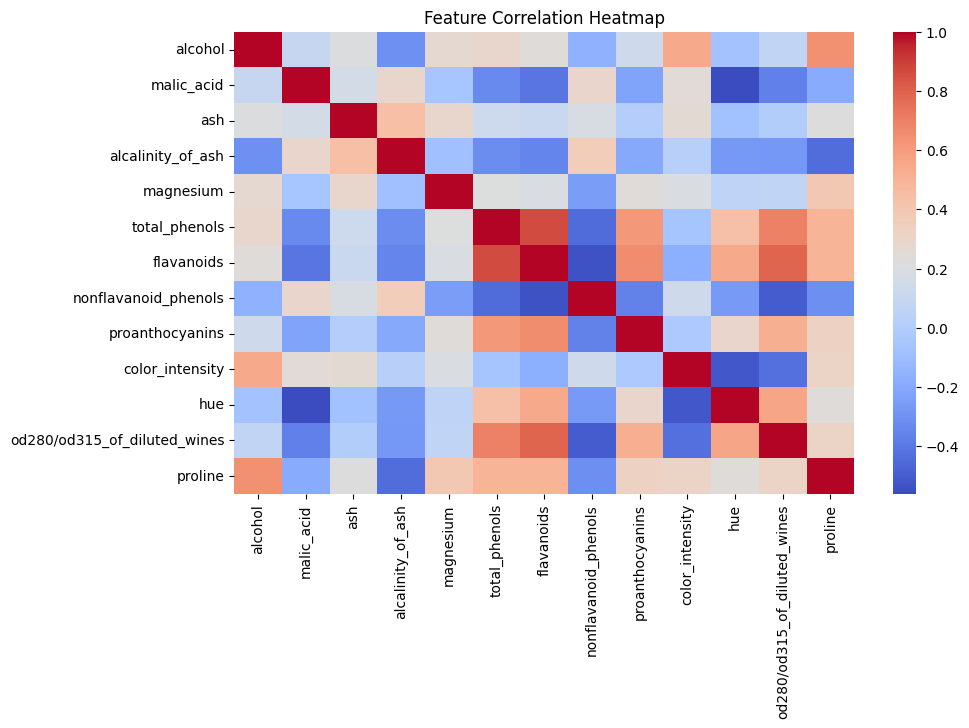

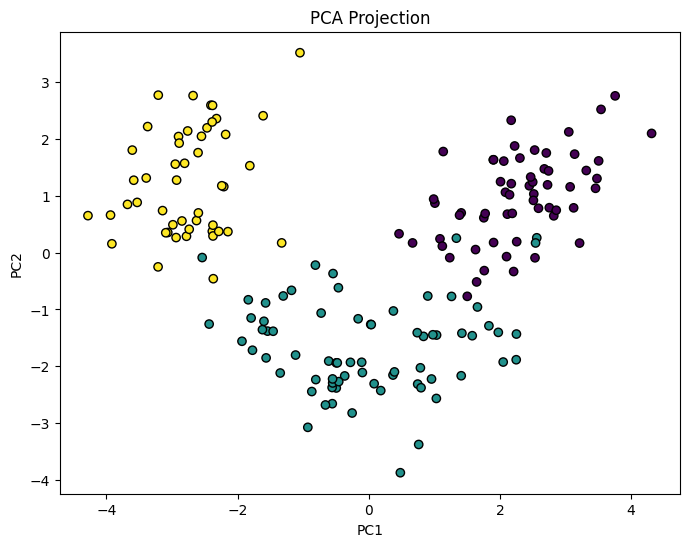

In [ ]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# EDA
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## **Models**

In [ ]:
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'Ridge Classifier': (RidgeClassifier(), {'alpha': [0.1, 1, 10]}),
    'k-NN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 5, None]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 5]}),
    'Extra Trees': (ExtraTreesClassifier(), {'n_estimators': [50, 100]}),
    'SVM': (SVC(probability=True), {'C': [1, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100], 'learning_rate': [0.05, 0.1]}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100]}),
    'Naive Bayes': (GaussianNB(), {}),
    'LDA': (LinearDiscriminantAnalysis(), {})
}

## **Train, Evaluate, Visualization**


 Training: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


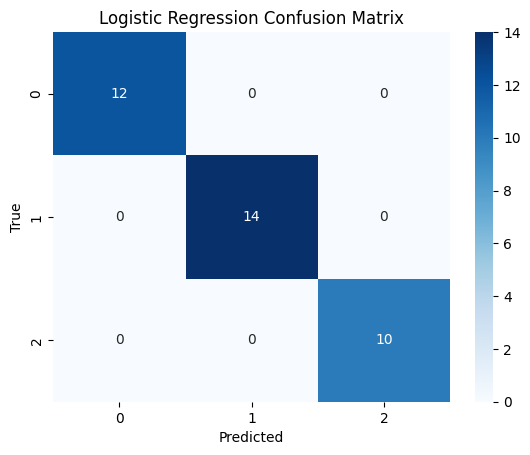

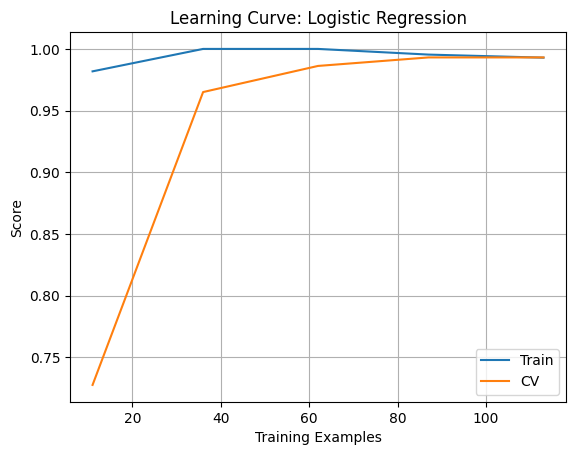


 Training: Ridge Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:


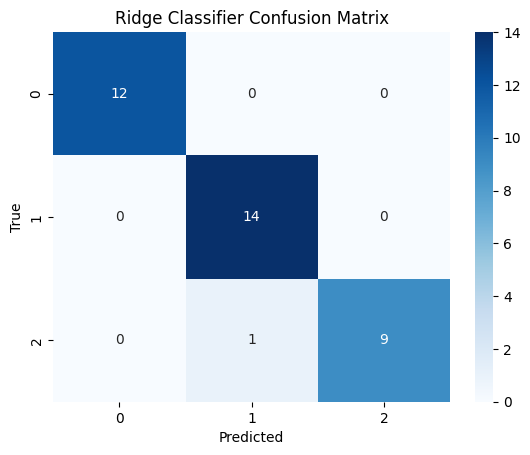

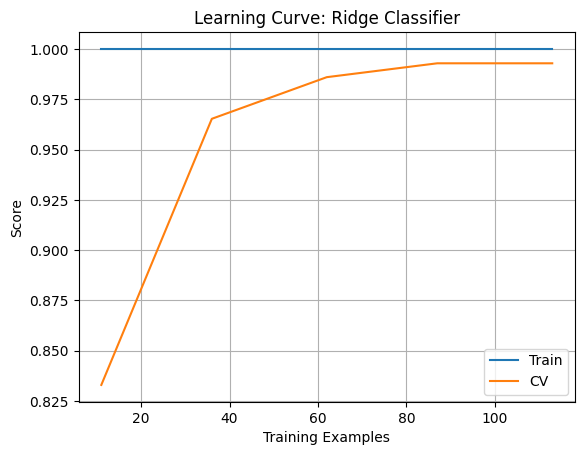


 Training: k-NN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


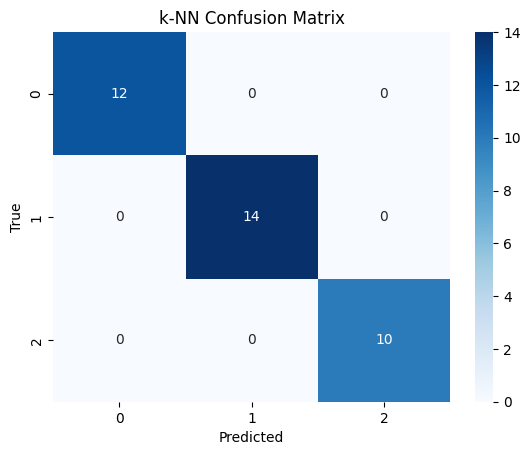

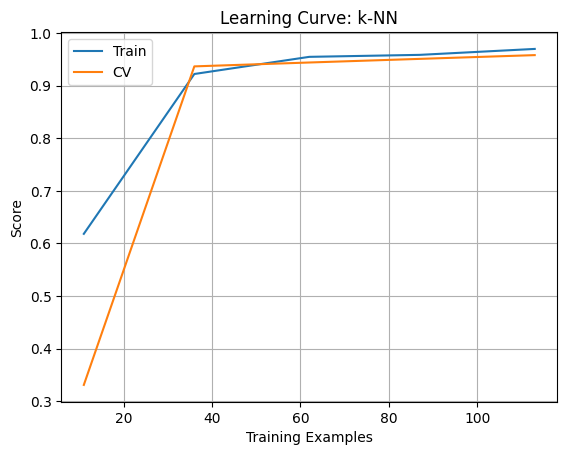


 Training: Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:


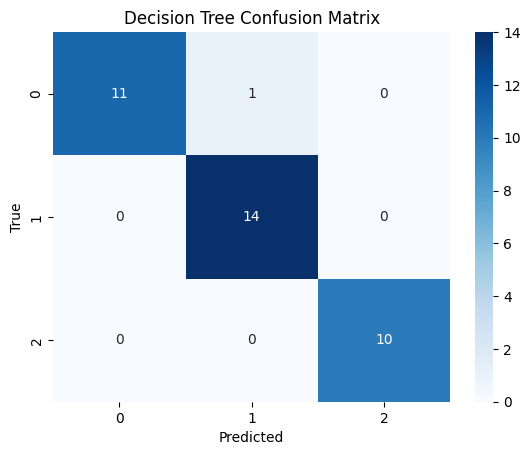

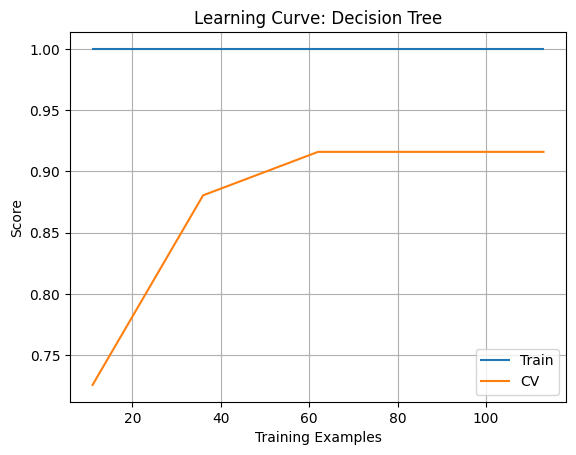


 Training: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


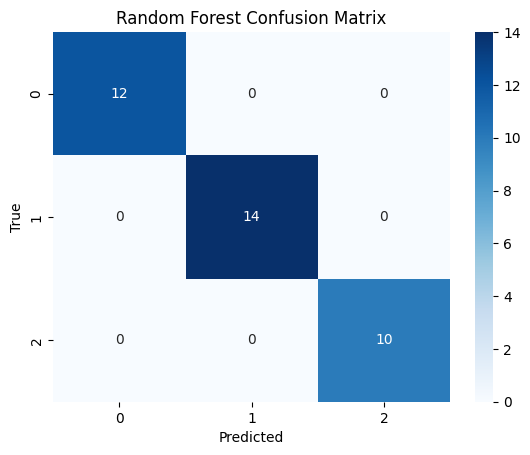

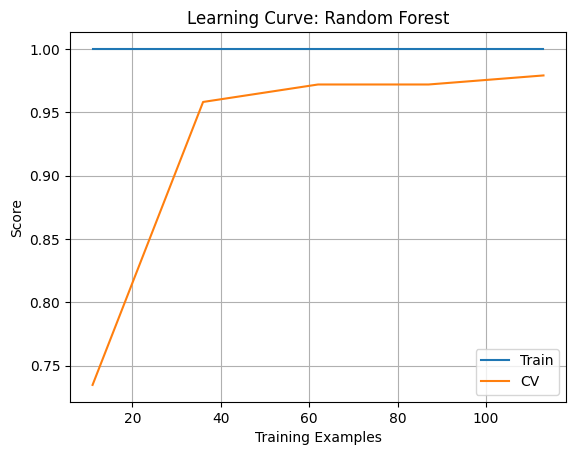


 Training: Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:


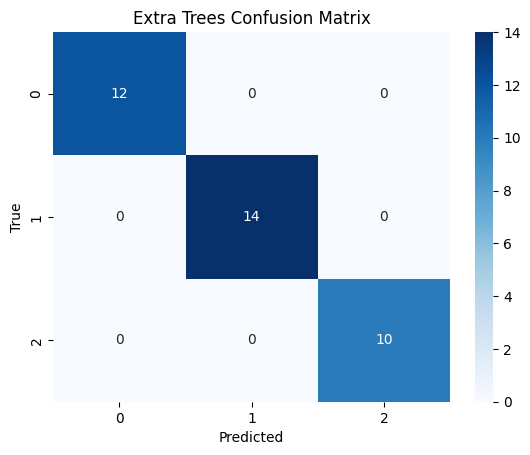

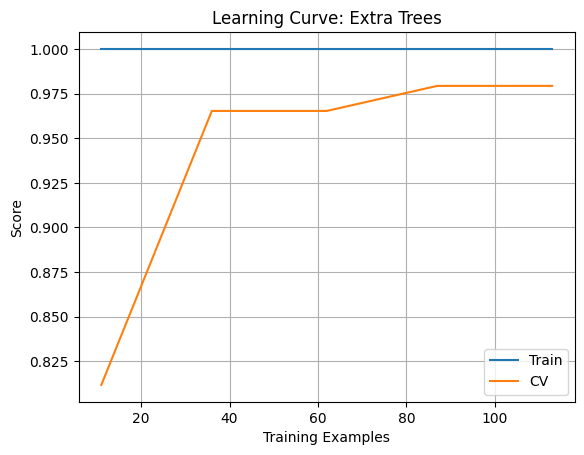


 Training: SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:


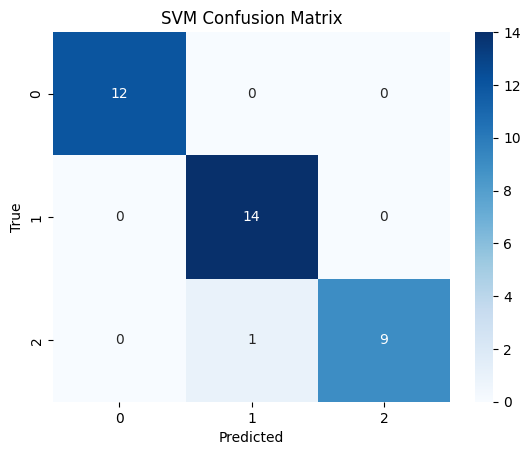

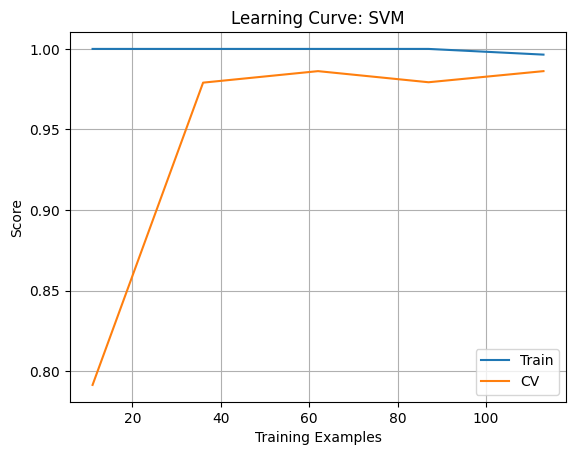


 Training: Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:


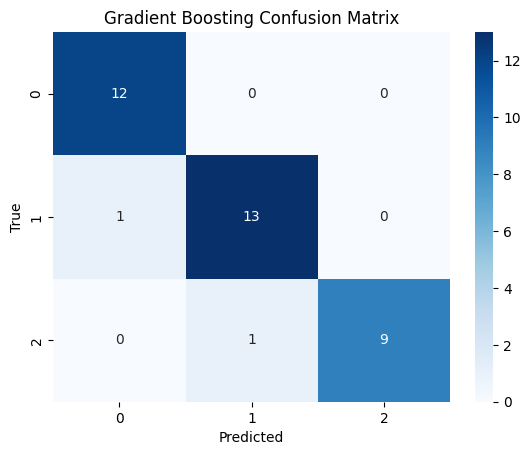

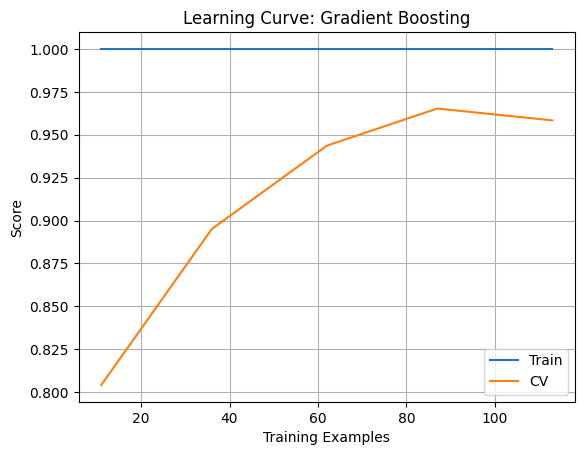


 Training: AdaBoost
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.92      0.86      0.89        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

Confusion Matrix:


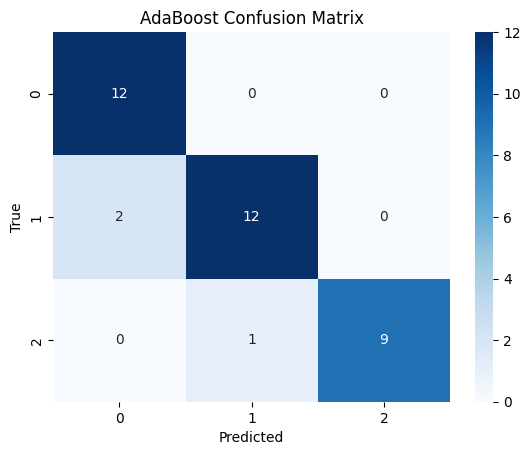

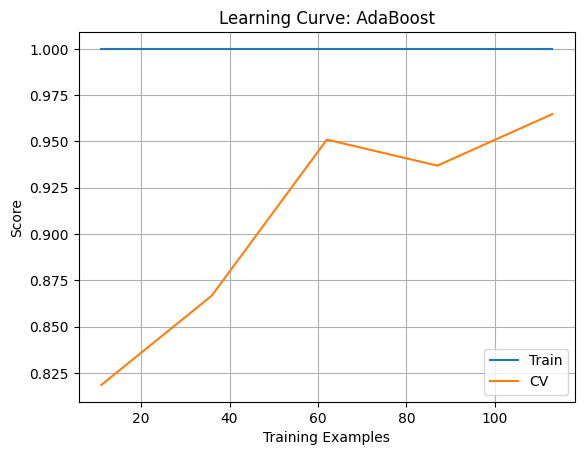


 Training: Naive Bayes
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:


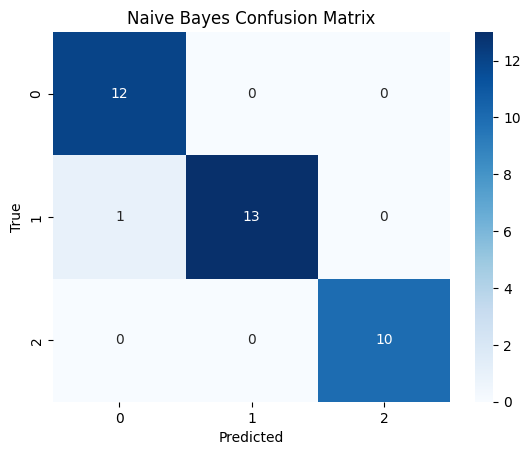

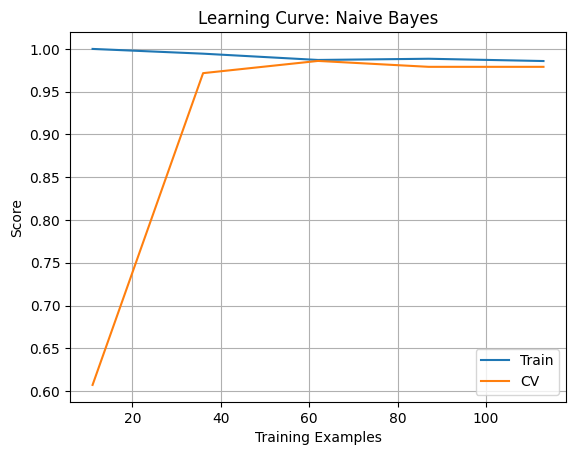


 Training: LDA
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:


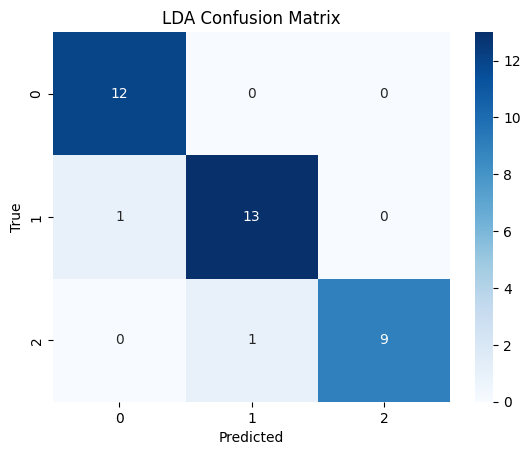

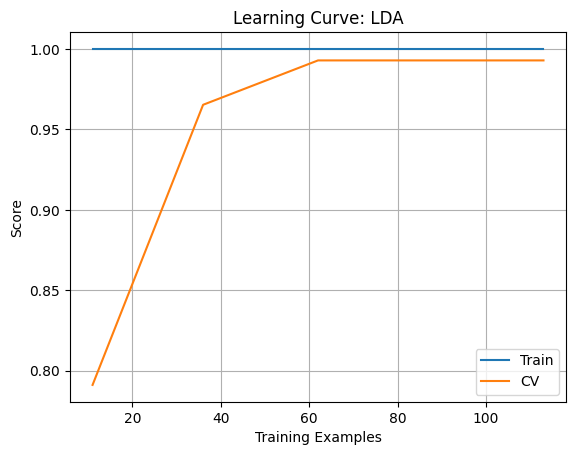

In [ ]:
metrics_summary = []

def plot_learning(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.plot(train_sizes, test_scores_mean, label='CV')
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend()
    plt.grid()
    plt.show()

for name, (model, params) in models.items():
    print(f"\n Training: {name}")
    clf = GridSearchCV(model, params, cv=5) if params else model
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_ if params else clf
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    auc_score = roc_auc_score(label_binarize(y_test, classes=[0,1,2]),
                              y_proba, multi_class='ovr') if y_proba is not None else np.nan

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

    plot_learning(best_model, f"Learning Curve: {name}")

    metrics_summary.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'Precision': prec,
        'Recall': rec,
        'AUC': auc_score
    })


## **Final Comparison**

<Figure size 1400x600 with 0 Axes>

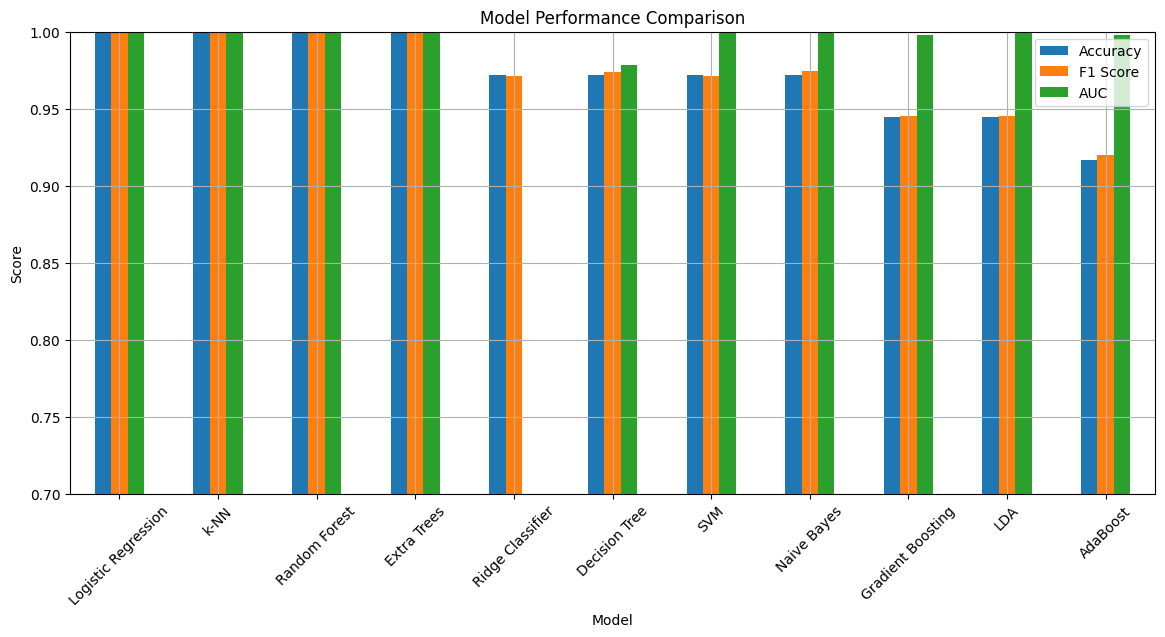



 Summary Table


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000,1.000,1.000,1.000,1.000
2,k-NN,1.000,1.000,1.000,1.000,1.000
4,Random Forest,1.000,1.000,1.000,1.000,1.000
5,Extra Trees,1.000,1.000,1.000,1.000,1.000
1,Ridge Classifier,0.972,0.971,0.978,0.967,NaN
3,Decision Tree,0.972,0.974,0.978,0.972,0.979
6,SVM,0.972,0.971,0.978,0.967,1.000
9,Naive Bayes,0.972,0.974,0.974,0.976,1.000
7,Gradient Boosting,0.944,0.945,0.951,0.943,0.998
10,LDA,0.944,0.945,0.951,0.943,0.999


In [ ]:
df_metrics = pd.DataFrame(metrics_summary).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(14, 6))
df_metrics.set_index("Model")[['Accuracy', 'F1 Score', 'AUC']].plot(kind='bar', figsize=(14,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print("\n\n Summary Table")
display(df_metrics.round(3))